In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the Dataset
df = pd.read_excel('data/Coffee Shop Sales.xlsx')

# Step 2: Data Preprocessing
# Calculate Total Sales as (transaction_qty * unit_price)
df['Total Sales'] = df['transaction_qty'] * df['unit_price']

# Drop any unnecessary columns
df = df.drop(['transaction_id', 'transaction_date', 'transaction_time', 'product_detail'], axis=1)

# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, drop_first=True)

# Define feature set X and target y
X = df.drop(['Total Sales'], axis=1)  # Features
y = df['Total Sales']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Training and Evaluation

# Dictionary to store RMSE and R-squared for each model
model_results = {}

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
model_results['Linear Regression'] = {'RMSE': rmse_lr, 'R^2': r2_lr}

# Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)
model_results['Decision Tree'] = {'RMSE': rmse_dt, 'R^2': r2_dt}

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
model_results['Random Forest'] = {'RMSE': rmse_rf, 'R^2': r2_rf}

# XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
model_results['XGBoost'] = {'RMSE': rmse_xgb, 'R^2': r2_xgb}

# Step 4: Display Model Results
for model_name, metrics in model_results.items():
    print(f"{model_name}: RMSE = {metrics['RMSE']}, R^2 = {metrics['R^2']}")


Linear Regression: RMSE = 0.8039139882505983, R^2 = 0.9293120576622209
Decision Tree: RMSE = 3.2531526078706373e-14, R^2 = 1.0
Random Forest: RMSE = 0.0032960178861133876, R^2 = 0.9999988117569347
XGBoost: RMSE = 0.0001283576835521317, R^2 = 0.9999999981979373


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the Dataset
df = pd.read_excel('data/Coffee Shop Sales.xlsx')
print(df['store_location'].unique())
print(df['product_category'].unique())
print(df['product_type'].unique())
df

['Lower Manhattan' "Hell's Kitchen" 'Astoria']
['Coffee' 'Tea' 'Drinking Chocolate' 'Bakery' 'Flavours' 'Loose Tea'
 'Coffee beans' 'Packaged Chocolate' 'Branded']
['Gourmet brewed coffee' 'Brewed Chai tea' 'Hot chocolate' 'Drip coffee'
 'Scone' 'Barista Espresso' 'Brewed Black tea' 'Brewed Green tea'
 'Brewed herbal tea' 'Biscotti' 'Pastry' 'Organic brewed coffee'
 'Premium brewed coffee' 'Regular syrup' 'Herbal tea' 'Gourmet Beans'
 'Organic Beans' 'Sugar free syrup' 'Drinking Chocolate' 'Premium Beans'
 'Chai tea' 'Green beans' 'Espresso Beans' 'Green tea' 'Organic Chocolate'
 'Housewares' 'Black tea' 'House blend Beans' 'Clothing']


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [13]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# import optuna

# import warnings
# warnings.filterwarnings("ignore")

# # Step 1: Load the Dataset
# df = pd.read_excel('data/Coffee Shop Sales.xlsx')

# # Step 2: Data Preprocessing
# # Calculate Total Sales as (transaction_qty * unit_price)
# df['Total Sales'] = df['transaction_qty'] * df['unit_price']

# # Drop unnecessary columns
# df = df.drop(['transaction_id', 'transaction_date', 'transaction_time', 'product_detail'], axis=1)

# # Convert categorical variables into dummy/indicator variables
# df = pd.get_dummies(df, drop_first=True)

# # Define feature set X and target y
# X = df.drop(['Total Sales'], axis=1)  # Features
# y = df['Total Sales']  # Target

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Step 3: Define the objective functions for Random Forest and XGBoost with Optuna

# def rf_objective(trial):
#     """Objective function for Random Forest optimization with Optuna."""
#     # Define hyperparameter search space
#     n_estimators = trial.suggest_int('n_estimators', 50, 500)
#     max_depth = trial.suggest_int('max_depth', 5, 20)
#     min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
#     min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)
    
#     rf = RandomForestRegressor(
#         n_estimators=n_estimators,
#         max_depth=max_depth,
#         min_samples_split=min_samples_split,
#         min_samples_leaf=min_samples_leaf,
#         random_state=42
#     )
    
#     # Cross-validation
#     cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
#     return np.mean(cv_scores)

# def xgb_objective(trial):
#     """Objective function for XGBoost optimization with Optuna."""
#     # Define hyperparameter search space
#     n_estimators = trial.suggest_int('n_estimators', 50, 500)
#     max_depth = trial.suggest_int('max_depth', 3, 15)
#     learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
#     colsample_bytree = trial.suggest_float('colsample_bytree', 0.3, 1.0)
    
#     xgb = XGBRegressor(
#         n_estimators=n_estimators,
#         max_depth=max_depth,
#         learning_rate=learning_rate,
#         colsample_bytree=colsample_bytree,
#         random_state=42
#     )
    
#     # Cross-validation
#     cv_scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
#     return np.mean(cv_scores)

# # Step 4: Optimize Random Forest
# print("Optimizing Random Forest...")
# rf_study = optuna.create_study(direction='maximize')
# rf_study.optimize(rf_objective, n_trials=50)

# # Step 5: Optimize XGBoost
# print("Optimizing XGBoost...")
# xgb_study = optuna.create_study(direction='maximize')
# xgb_study.optimize(xgb_objective, n_trials=50)

# # Step 6: Train the best models using the optimized hyperparameters

# # Random Forest
# best_rf_params = rf_study.best_params
# print("Best Random Forest Params: ", best_rf_params)
# rf_model = RandomForestRegressor(**best_rf_params, random_state=42)
# rf_model.fit(X_train, y_train)
# y_pred_rf = rf_model.predict(X_test)

# # XGBoost
# best_xgb_params = xgb_study.best_params
# print("Best XGBoost Params: ", best_xgb_params)
# xgb_model = XGBRegressor(**best_xgb_params, random_state=42)
# xgb_model.fit(X_train, y_train)
# y_pred_xgb = xgb_model.predict(X_test)

# # Step 7: Evaluate the models with the optimized parameters
# print("\nModel Performance After Optimization:\n")

# # Random Forest
# rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
# r2_rf = r2_score(y_test, y_pred_rf)
# print(f"Random Forest - RMSE: {rmse_rf}, R²: {r2_rf}")

# # XGBoost
# rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
# r2_xgb = r2_score(y_test, y_pred_xgb)
# print(f"XGBoost - RMSE: {rmse_xgb}, R²: {r2_xgb}")


In [24]:
# import pandas as pd
# import joblib
# from sklearn.model_selection import train_test_split
# from xgboost import XGBRegressor

# # Load dataset
# df = pd.read_excel('data/Coffee Shop Sales.xlsx')

# # Preprocessing
# df['Total Sales'] = df['transaction_qty'] * df['unit_price']
# df = df.drop(['transaction_id', 'transaction_date', 'transaction_time', 'product_detail'], axis=1)

# # One-hot encode categorical variables
# df = pd.get_dummies(df, drop_first=True)

# # Save column structure
# joblib.dump(df.columns, 'columns.pkl')

# # Define feature set X and target y
# X = df.drop('Total Sales', axis=1)
# y = df['Total Sales']

# # Split the dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train XGBoost model
# model = XGBRegressor()
# model.fit(X_train, y_train)

# # Save the trained model
# joblib.dump(model, 'xgb_coffee_sales_model.joblib')


In [31]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Step 1: Load the Dataset and Preprocess
df = pd.read_excel('data/Coffee Shop Sales.xlsx')

# Extract year and month from 'transaction_date'
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['year'] = df['transaction_date'].dt.year
df['month'] = df['transaction_date'].dt.month

# Calculate total sales
df['Total Sales'] = df['transaction_qty'] * df['unit_price']

# Drop unnecessary columns
df = df.drop(['transaction_id', 'transaction_time', 'transaction_date', 'product_detail'], axis=1)

# One-Hot Encode categorical variables
df = pd.get_dummies(df, columns=['store_location', 'product_category', 'product_type'], drop_first=True)

# Save the feature columns for later use
joblib.dump(df.columns, 'columns.pkl')

# Define feature set X and target y
X = df.drop(['Total Sales'], axis=1)
y = df['Total Sales']

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(xgb_model, 'xgb_coffee_sales_model.joblib')

# Step 4: Evaluate the Model
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost RMSE: {rmse_xgb}")
print(f"XGBoost R^2: {r2_xgb}")


XGBoost RMSE: 0.0001283576835521317
XGBoost R^2: 0.9999999981979373


XGBoost RMSE: 0.0001283576835521317
XGBoost R^2: 0.9999999981979373


/Users/ismatsamadov/Sales_Forecasting/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

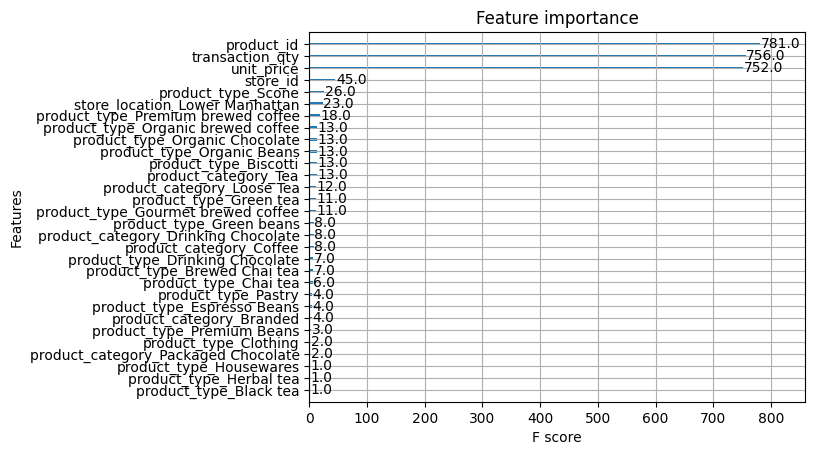

In [8]:
import pandas as pd
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt

# Step 1: Load the Dataset and Preprocess
df = pd.read_excel('data/Coffee Shop Sales.xlsx')

# Extract year and month from 'transaction_date'
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['year'] = df['transaction_date'].dt.year
df['month'] = df['transaction_date'].dt.month

# Calculate total sales
df['Total Sales'] = df['transaction_qty'] * df['unit_price']

# Drop unnecessary columns
df = df.drop(['transaction_id', 'transaction_time', 'transaction_date', 'product_detail'], axis=1)

# One-Hot Encode categorical variables
df = pd.get_dummies(df, columns=['store_location', 'product_category', 'product_type'], drop_first=True)

# Save the feature columns for later use
joblib.dump(df.columns, 'columns.pkl')

# Define feature set X and target y
X = df.drop(['Total Sales'], axis=1)
y = df['Total Sales']

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(xgb_model, 'xgb_coffee_sales_model.joblib')

# Step 4: Evaluate the Model
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost RMSE: {rmse_xgb}")
print(f"XGBoost R^2: {r2_xgb}")

# Feature importance (optional)
plt.figure(figsize=(10, 6))
plot_importance(xgb_model)
plt.show()


XGBoost RMSE: 0.0001583801626504911
XGBoost R^2: 0.9999999972563561


/Users/ismatsamadov/Sales_Forecasting/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

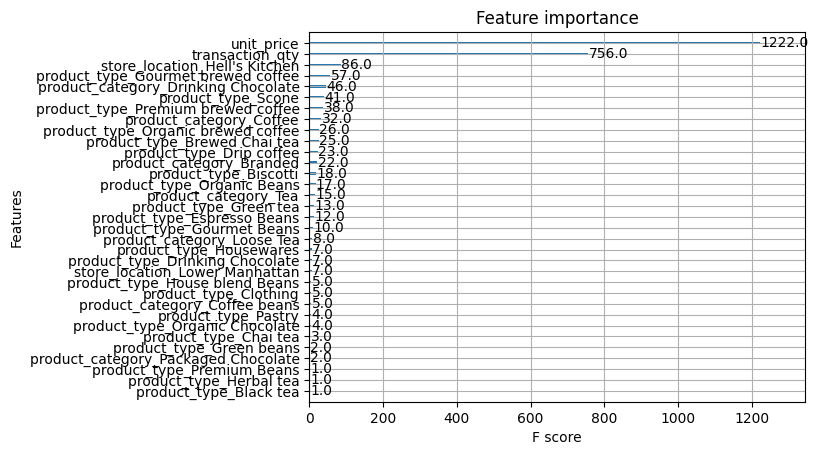

In [9]:
import pandas as pd
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt

# Step 1: Load the Dataset and Preprocess
df = pd.read_excel('data/Coffee Shop Sales.xlsx')

# Extract year and month from 'transaction_date'
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['year'] = df['transaction_date'].dt.year
df['month'] = df['transaction_date'].dt.month

# Calculate total sales
df['Total Sales'] = df['transaction_qty'] * df['unit_price']

# Drop unnecessary columns including ID columns
df = df.drop(['transaction_id', 'store_id', 'product_id', 'transaction_time', 'transaction_date', 'product_detail'], axis=1)

# One-Hot Encode categorical variables
df = pd.get_dummies(df, columns=['store_location', 'product_category', 'product_type'], drop_first=True)

# Save the feature columns for later use
joblib.dump(df.columns, 'columns.pkl')

# Define feature set X and target y
X = df.drop(['Total Sales'], axis=1)
y = df['Total Sales']

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(xgb_model, 'xgb_coffee_sales_model.joblib')

# Step 4: Evaluate the Model
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost RMSE: {rmse_xgb}")
print(f"XGBoost R^2: {r2_xgb}")

# Feature importance (optional)
plt.figure(figsize=(10, 6))
plot_importance(xgb_model)
plt.show()


XGBoost RMSE: 2.1462559380170294
XGBoost R^2: 0.4961640082211928


/Users/ismatsamadov/Sales_Forecasting/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

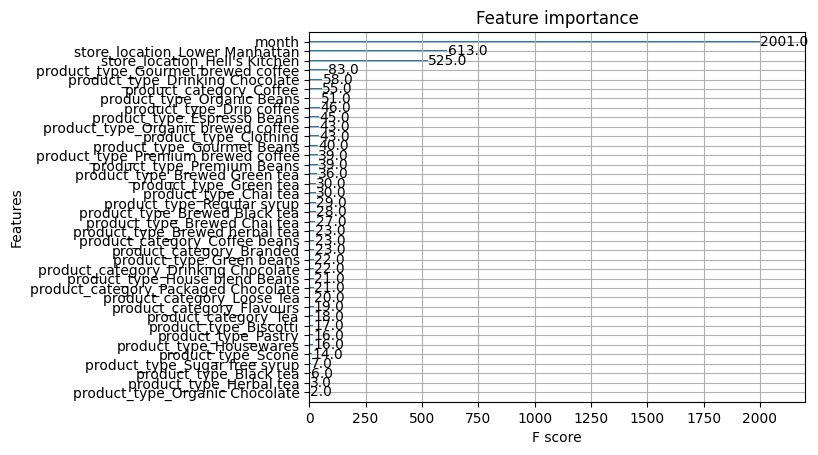

In [11]:
import pandas as pd
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt

# Step 1: Load the Dataset and Preprocess
df = pd.read_excel('data/Coffee Shop Sales.xlsx')

# Extract year and month from 'transaction_date'
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['year'] = df['transaction_date'].dt.year
df['month'] = df['transaction_date'].dt.month

# Calculate total sales
df['Total Sales'] = df['transaction_qty'] * df['unit_price']

# Drop unnecessary columns including transaction_qty, unit_price, and ID columns
df = df.drop(['transaction_id', 'store_id', 'product_id', 'transaction_time', 'transaction_date', 'product_detail', 'transaction_qty', 'unit_price'], axis=1)

# One-Hot Encode categorical variables
df = pd.get_dummies(df, columns=['store_location', 'product_category', 'product_type'], drop_first=True)

# Save the feature columns for later use
joblib.dump(df.columns, 'columns.pkl')

# Define feature set X and target y
X = df.drop(['Total Sales'], axis=1)
y = df['Total Sales']

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(xgb_model, 'xgb_coffee_sales_model.joblib')

# Step 4: Evaluate the Model
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost RMSE: {rmse_xgb}")
print(f"XGBoost R^2: {r2_xgb}")

# Feature importance (optional)
plt.figure(figsize=(10, 6))
plot_importance(xgb_model)
plt.show()


In [21]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Step 1: Load the Dataset and Preprocess
df = pd.read_excel('data/Coffee Shop Sales.xlsx')

# Extract year and month from 'transaction_date'
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['year'] = df['transaction_date'].dt.year
df['month'] = df['transaction_date'].dt.month

# Calculate total sales
df['Total Sales'] = df['transaction_qty'] * df['unit_price']

# Drop unnecessary columns, including 'Total Sales' from features
df = df.drop(['transaction_id', 'transaction_time', 'transaction_date', 'product_detail'], axis=1)

# One-Hot Encode categorical variables
df = pd.get_dummies(df, columns=['store_location', 'product_category', 'product_type'], drop_first=True)

# Save the feature columns for later use
joblib.dump(df.columns, 'columns.pkl')

# Define feature set X (excluding 'Total Sales') and target y
X = df.drop(['Total Sales'], axis=1)  # Features
y = df['Total Sales']  # Target variable

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(xgb_model, 'xgb_coffee_sales_model.joblib')

# Step 4: Evaluate the Model
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost RMSE: {rmse_xgb}")
print(f"XGBoost R^2: {r2_xgb}")


XGBoost RMSE: 0.0001283576835521317
XGBoost R^2: 0.9999999981979373


/Users/ismatsamadov/Sales_Forecasting/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [22]:
import pandas as pd
import joblib

# Load the trained model and feature columns
xgb_model = joblib.load('xgb_coffee_sales_model.joblib')
columns = joblib.load('columns.pkl')

# Example input for Lower Manhattan in January 2024
example_input = {
    'year': [2024],
    'month': [1],
    "store_location_Hell's Kitchen": [0],
    'store_location_Lower Manhattan': [1],
    'product_category_Coffee': [1],
    'product_category_Tea': [0],
    'product_category_Drinking Chocolate': [0],
    'product_category_Bakery': [0],
    'product_category_Flavours': [0],
    'product_category_Loose Tea': [0],
    'product_category_Coffee beans': [0],
    'product_category_Packaged Chocolate': [0],
    'product_category_Branded': [0],
    'product_type_Biscotti': [0],
    'product_type_Black tea': [0],
    'product_type_Brewed Black tea': [0],
    'product_type_Brewed Chai tea': [0],
    'product_type_Brewed Green tea': [0],
    'product_type_Brewed herbal tea': [0],
    'product_type_Chai tea': [0],
    'product_type_Clothing': [0],
    'product_type_Drinking Chocolate': [0],
    'product_type_Drip coffee': [0],
    'product_type_Espresso Beans': [0],
    'product_type_Gourmet Beans': [0],
    'product_type_Gourmet brewed coffee': [0],
    'product_type_Green beans': [0],
    'product_type_Green tea': [0],
    'product_type_Herbal tea': [0],
    'product_type_Hot chocolate': [0],
    'product_type_House blend Beans': [0],
    'product_type_Housewares': [0],
    'product_type_Organic Beans': [0],
    'product_type_Organic Chocolate': [0],
    'product_type_Organic brewed coffee': [0],
    'product_type_Pastry': [0],
    'product_type_Premium Beans': [0],
    'product_type_Premium brewed coffee': [0],
    'product_type_Regular syrup': [0],
    'product_type_Scone': [0],
    'product_type_Sugar free syrup': [0]
}

# Convert input to DataFrame
example_input_df = pd.DataFrame(example_input)

# Ensure all necessary columns are present
for col in columns:
    if col not in example_input_df.columns:
        example_input_df[col] = 0

# Reorder columns to match the trained model
example_input_df = example_input_df[columns]

# Ensure 'Total Sales' is not in the prediction input
if 'Total Sales' in example_input_df.columns:
    example_input_df = example_input_df.drop('Total Sales', axis=1)

# Make prediction
predicted_sales = xgb_model.predict(example_input_df)

print(f"Predicted Sales for Lower Manhattan in 2024-1: {predicted_sales[0]}")


Predicted Sales for Lower Manhattan in 2024-1: 3.297071933746338
